<a href="https://colab.research.google.com/github/path-0f-misantrope/Intensive-armatura/blob/%D0%BC%D0%B0%D1%80%D0%B0%D1%82/%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade numpy pandas scipy
!pip install --upgrade --force-reinstall pmdarima
!pip uninstall -y numpy pandas pmdarima
!pip install numpy==1.26.4 pandas==2.2.2 pmdarima


  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 13.4 MB/s eta 0:00:00
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.0 MB/s eta 0:00:00
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
   ━━━━━━━━━━━━━━

Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 66.2 MB/s eta 0:00:00
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


In [1]:
from pmdarima import auto_arima
print("pmdarima импортирован успешно!")


pmdarima импортирован успешно!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")


Цена на арматуру                                  0
Price_x                                           0
Open_x                                            0
High_x                                            0
Low_x                                             0
                                                 ..
Экспорт сырья Чугун_Передельный чугун             0
Экспорт арматуры Сортовой прокат_Арматура         0
Экспорт арматуры Сортовой прокат_Катанка          0
Экспорт арматуры Сортовой прокат_Прутки прочие    0
month                                             0
Length: 151, dtype: int64


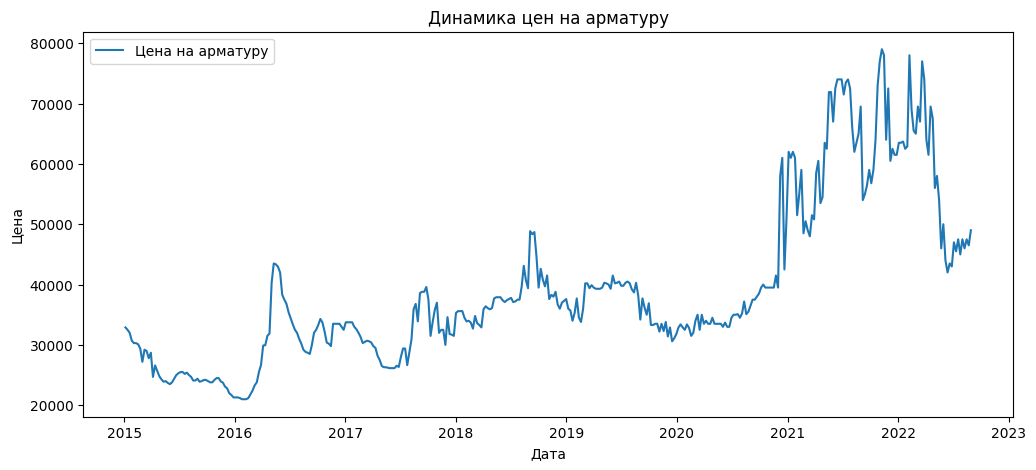

            Цена на арматуру  Price_x  Open_x  High_x   Low_x    Vol._x  \
dt                                                                        
2015-01-05             32900   1029.8  1005.4  1029.8  1002.0  929280.0   
2015-01-12             32500   1029.8  1005.4  1029.8  1002.0  929280.0   
2015-01-19             32000   1029.8  1005.4  1029.8  1002.0  929280.0   
2015-01-26             30700   1029.8  1005.4  1029.8  1002.0  929280.0   
2015-02-02             30300   1029.8  1005.4  1029.8  1002.0  929280.0   

            Change %_x    Цена   Откр.   Макс.  ...  \
dt                                              ...   
2015-01-05        2.82  4470.0  4380.0  4480.0  ...   
2015-01-12        2.82  4470.0  4380.0  4480.0  ...   
2015-01-19        2.82  4470.0  4380.0  4480.0  ...   
2015-01-26        2.82  4470.0  4380.0  4480.0  ...   
2015-02-02        2.82  4470.0  4380.0  4480.0  ...   

            Экспорт сырья Кокс_Орешек коксовый  \
dt                                    

In [3]:
# Загрузка данных
df = pd.read_csv("/content/result (2).csv", parse_dates=["dt"])
df.set_index("dt", inplace=True)

# Проверяем пропуски
print(df.isnull().sum())

# Визуализируем временной ряд
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Цена на арматуру"], label="Цена на арматуру")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.title("Динамика цен на арматуру")
plt.legend()
plt.show()


print(df.head())
print(df.index.freq)  # Проверяем частоту



In [4]:
result = adfuller(df["Цена на арматуру"])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("Ряд нестационарный, требуется дифференцирование")
else:
    print("Ряд стационарный")


ADF Statistic: -1.5484468381220473
p-value: 0.5094239275287091
Ряд нестационарный, требуется дифференцирование


In [10]:
#df.drop(columns=['month'], inplace=True)
df.fillna(method="bfill", inplace=True)
df.fillna(method="ffill", inplace=True)


In [6]:

# Проверяем стационарность всех переменных
for col in df.columns:
    # Skip if the column is constant after dropping NaNs
    if df[col].dropna().nunique() <= 1:
        print(f'{col}: Constant - skipping ADF test')
        continue  # Proceed to the next column
    result = adfuller(df[col].dropna())
    print(f'{col}: p-value = {result[1]}')

    # Если ряд нестационарный, делаем разности
    if result[1] > 0.05:
        df[col] = df[col].diff()


Цена на арматуру: p-value = 0.5094239275287091
Price_x: p-value = 0.028528560440732022
Open_x: p-value = 0.028620813336093804
High_x: p-value = 0.027628653724254194
Low_x: p-value = 0.033084398221088766
Vol._x: p-value = 0.1459816214031619
Change %_x: p-value = 0.03660167765493671
Цена: p-value = 0.18737106146737398
Откр.: p-value = 0.17496671772110212
Макс.: p-value = 0.1847577580715113
Мин.: p-value = 0.17192246192776867
Объём: p-value = 1.1368280673492362e-05
Изм. %: p-value = 0.11149842352638467
Price_y: p-value = 0.07808156491053234
Open_y: p-value = 0.08471490408910082
High_y: p-value = 0.07340887539360223
Low_y: p-value = 0.09073087620502257
Vol._y: p-value = 0.17868675813451812
Change %_y: p-value = 2.1949272070859955e-08
Импорт цемента ЖД: p-value = 0.6629026033082743
Экспорт цемента ЖД: p-value = 0.16072811962011974
Отгрузка цемента хоппер ЖД: p-value = 0.5983872778695484
Отгрузка цемента остальные ЖД: p-value = 0.08760490680977506
Производство цемента: p-value = 0.2166071383

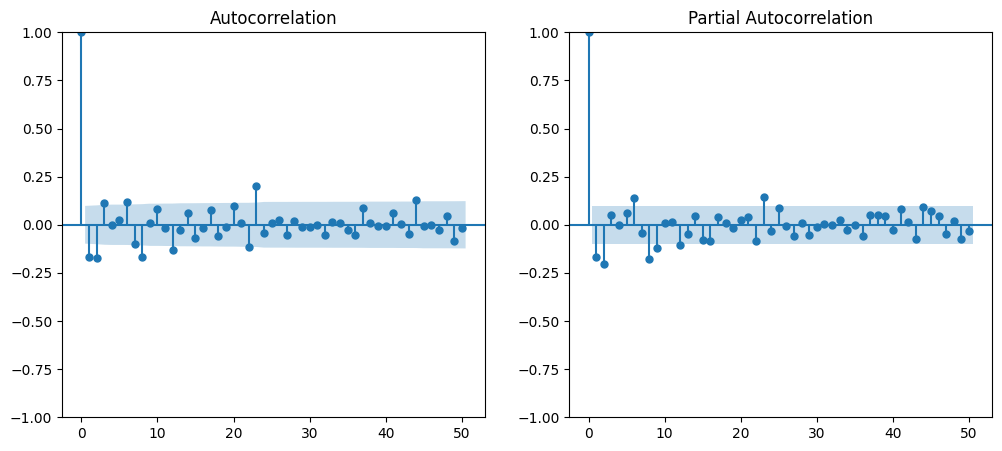

In [7]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
plot_acf(df["Цена на арматуру"].dropna(), lags=50, ax=axes[0])
plot_pacf(df["Цена на арматуру"].dropna(), lags=50, ax=axes[1])
plt.show()


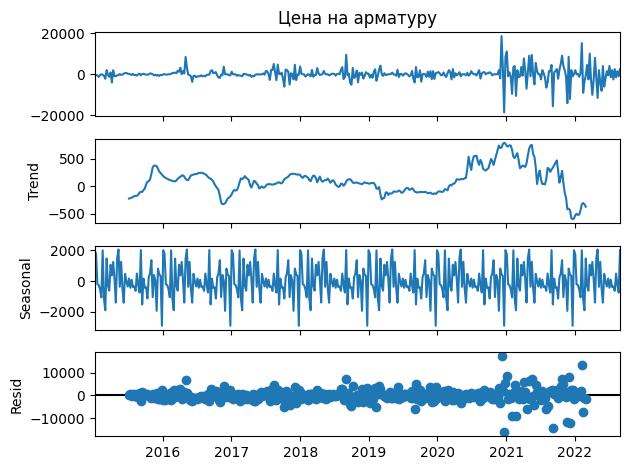

In [11]:
result = seasonal_decompose(df["Цена на арматуру"], model='additive', period=52)  # 52 недели = 1 год
result.plot()
plt.show()


In [14]:




exog_vars = df.drop(columns=["Цена на арматуру"])  # Удаляем целевую переменную


# Подбор модели с учетом exog
auto_model = auto_arima(df["Цена на арматуру"],
                        exogenous=exog_vars,  # Добавляем внешние факторы
                        seasonal=True,
                        m=52,
                        stepwise=True,
                        trace=True)

print(auto_model.summary())

# Получаем параметры
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=7570.255, Time=15.02 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=7600.555, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=7583.983, Time=4.74 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=7576.607, Time=1.93 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=7598.615, Time=0.05 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=7568.872, Time=4.28 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=7579.195, Time=0.25 sec
 ARIMA(2,0,2)(0,0,2)[52] intercept   : AIC=7570.264, Time=28.88 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=7570.175, Time=6.46 sec
 ARIMA(2,0,2)(1,0,2)[52] intercept   : AIC=7572.238, Time=45.75 sec
 ARIMA(1,0,2)(0,0,1)[52] intercept   : AIC=7568.991, Time=5.85 sec
 ARIMA(2,0,1)(0,0,1)[52] intercept   : AIC=7566.742, Time=3.19 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=7577.144, Time=0.17 sec
 ARIMA(2,0,1)(1,0,1)[52] intercept   : AIC=7568.090, Time=6.11 sec
 ARIMA(2,0,1)(0,

Best model:  ARIMA(2,0,0)(0,0,1)[52]          
Total fit time: 313.573 seconds

In [16]:
# Обучаем модель с внешними переменными
model = SARIMAX(df["Цена на арматуру"],
                exog=exog_vars,
                order=best_order,
                seasonal_order=best_seasonal_order)

model_fit = model.fit()
print(model_fit.summary())


                                      SARIMAX Results                                       
Dep. Variable:                     Цена на арматуру   No. Observations:                  400
Model:             SARIMAX(2, 0, 0)x(0, 0, [1], 52)   Log Likelihood               -3588.572
Date:                              Sat, 22 Mar 2025   AIC                           7483.144
Time:                                      12:29:02   BIC                           8093.838
Sample:                                  01-05-2015   HQIC                          7724.987
                                       - 08-29-2022                                         
Covariance Type:                                opg                                         
                                                                                                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [38]:
# Предсказания на обучающем наборе
df["predict"] = model_fit.predict()

# Метрики
r2 = r2_score(df["Цена на арматуру"], df["predict"])
rmse = np.sqrt(mean_squared_error(df["Цена на арматуру"], df["predict"]))
mae = mean_absolute_error(df["Цена на арматуру"], df["predict"])

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R²: 0.6496
RMSE: 1905.35
MAE: 1253.22


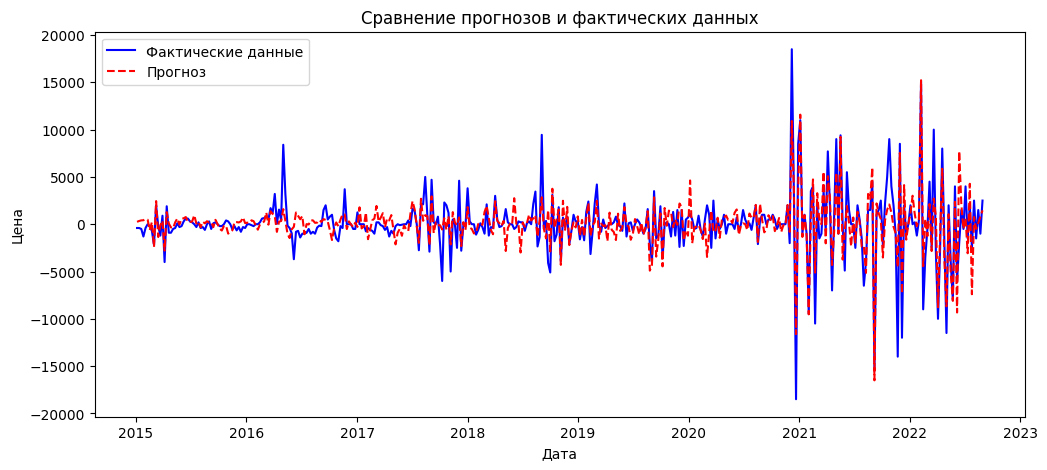

In [74]:

plt.figure(figsize=(12,5))
plt.plot(df.index, df["Цена на арматуру"], label="Фактические данные", color="blue")
plt.plot(df.index, df["predict"], label="Прогноз", color="red", linestyle="dashed")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.title("Сравнение прогнозов и фактических данных")
plt.legend()
plt.show()


In [78]:
df_test = pd.read_csv("/content/test merged.csv", parse_dates=["dt"])
df_test.drop(columns=['month'],inplace=True)
#df_test.drop(columns=['predict'],inplace=True)
df_test.set_index("dt", inplace=True)

extra_cols = set(df_test.columns) - set(df.columns)
print("Лишние в df_test:", extra_cols)




Лишние в df_test: set()


In [81]:


df_test["predict"] = model_fit.predict(
    start=df_test.index[0],
    end=df_test.index[-1],
    exog=df_test.drop(columns=["Цена на арматуру"])  # Передаём exog-факторы
)


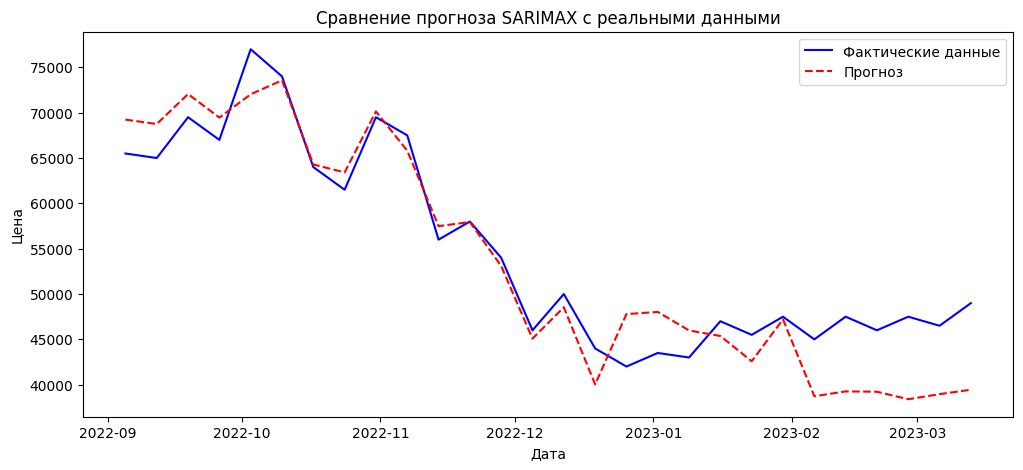

In [82]:
plt.figure(figsize=(12,5))
plt.plot(df_test.index, df_test["Цена на арматуру"], label="Фактические данные", color="blue")
plt.plot(df_test.index, df_test["predict"], label="Прогноз", color="red", linestyle="dashed")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.title("Сравнение прогноза SARIMAX с реальными данными")
plt.legend()
plt.show()


In [83]:
r2 = r2_score(df_test["Цена на арматуру"], df_test["predict"])
rmse = np.sqrt(mean_squared_error(df_test["Цена на арматуру"], df_test["predict"]))
mae = mean_absolute_error(df_test["Цена на арматуру"], df_test["predict"])

print(f"R² на тесте: {r2:.4f}")
print(f"RMSE на тесте: {rmse:.2f}")
print(f"MAE на тесте: {mae:.2f}")


R² на тесте: 0.8270
RMSE на тесте: 4442.37
MAE на тесте: 3459.11


получилось нормально, с учетом супер неверных и рандомных регрессоров(потому что их брать на тестовую неоткуда)